# Задание 1: Сравнение CNN и полносвязных сетей

In [7]:
import utils
import torch
import torch.nn as nn
import time
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
def get_inference_time(model: nn.Module, input_tensor: torch.Tensor, num_iterations: int = 100) -> float:
    model.eval()
    with torch.no_grad():
        torch.cuda.synchronize()
        start_time = time.time()
        for _ in range(num_iterations):
            _ = model(input_tensor)
        torch.cuda.synchronize()
        end_time = time.time()
    return (end_time - start_time) / num_iterations

## 1.1 Сравнение на MNIST

In [2]:
mnist_dataset = utils.MNISTDataset.get_merged_dataset()

### Полносвязная сеть

Время обучения: 133.09 секунд
Точность на тренировочной выборке: 0.99
Точность на валидационной выборке: 0.98
Время инференса: 0.001284 секунд


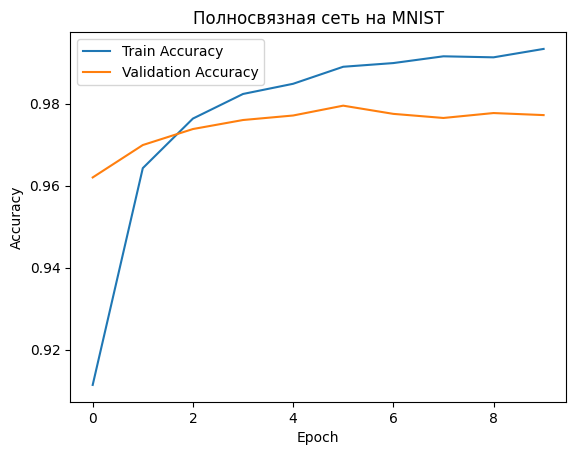

In [8]:
model = utils.FullyConnectedModel(
    input_dim=784,
    output_dim=10,
    layers=[
        utils.LinearLayer(256),
        utils.ReLULayer(),
        
        utils.LinearLayer(128),
        utils.ReLULayer(),
        
        utils.LinearLayer(64),
        utils.ReLULayer(),
    ],
).to("cuda")
trainer = utils.Trainer(
    model=model, dataset=mnist_dataset, device="cuda", batch_size=128
)
time_start = time.time()
result = trainer()
print(f"Время обучения: {time.time() - time_start:.2f} секунд")
print(f"Точность на тренировочной выборке: {result[-1].train_accuracy:.2f}")
print(f"Точность на валидационной выборке: {result[-1].val_accuracy:.2f}")
print(f"Время инференса: {get_inference_time(model, torch.randn(1, 784).to('cuda')):.6f} секунд")

plt.plot([r.train_accuracy for r in result], label="Train Accuracy")
plt.plot([r.val_accuracy for r in result], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Полносвязная сеть на MNIST")
plt.show()

### Простая CNN

Время обучения: 161.93 секунд
Точность на тренировочной выборке: 0.99
Точность на валидационной выборке: 0.99
Время инференса: 0.002050 секунд


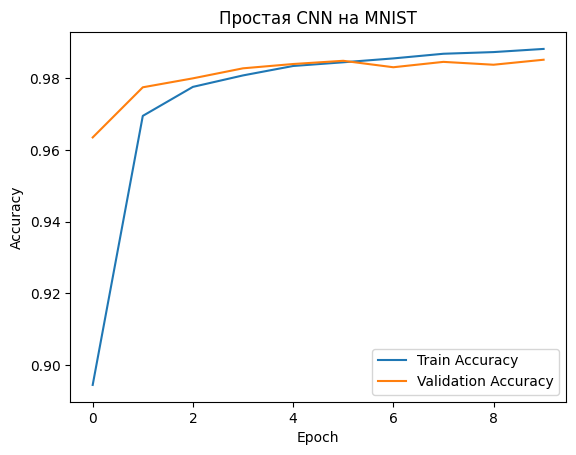

In [11]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, 3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(392, 10),
).to("cuda")
trainer = utils.Trainer(
    model=model, dataset=mnist_dataset, device="cuda", batch_size=128
)
time_start = time.time()
result = trainer()
print(f"Время обучения: {time.time() - time_start:.2f} секунд")
print(f"Точность на тренировочной выборке: {result[-1].train_accuracy:.2f}")
print(f"Точность на валидационной выборке: {result[-1].val_accuracy:.2f}")
print(f"Время инференса: {get_inference_time(model, torch.randn(1, 1, 28, 28).to('cuda')):.6f} секунд")

plt.plot([r.train_accuracy for r in result], label="Train Accuracy")
plt.plot([r.val_accuracy for r in result], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Простая CNN на MNIST")
plt.show()

### CNN с Residual Block

Время обучения: 248.82 секунд
Точность на тренировочной выборке: 1.00
Точность на валидационной выборке: 0.99
Время инференса: 0.005978 секунд


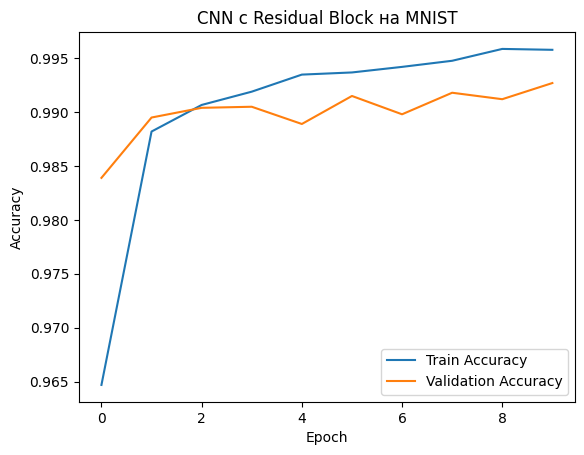

In [4]:
model = utils.CNNWithResidual(
    input_channels=1,
    num_classes=10,
)
trainer = utils.Trainer(
    model=model, dataset=mnist_dataset, device="cuda", batch_size=128
)
time_start = time.time()
result = trainer()
print(f"Время обучения: {time.time() - time_start:.2f} секунд")
print(f"Точность на тренировочной выборке: {result[-1].train_accuracy:.2f}")
print(f"Точность на валидационной выборке: {result[-1].val_accuracy:.2f}")
print(f"Время инференса: {get_inference_time(model, torch.randn(1, 1, 28, 28).to('cuda')):.6f} секунд")

plt.plot([r.train_accuracy for r in result], label="Train Accuracy")
plt.plot([r.val_accuracy for r in result], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN с Residual Block на MNIST")
plt.show()

### Результат

| |Время обучения|Точность (train)|Точность (validate)|Время инференса|
|-|--------------|----------------|-------------------|---------------|
|Полносвязная сеть|133.09|0.99|0.98|0.001284|
|Простая CNN|161.93|0.99|0.99|0.002050|
|CNN с Residual Block|248.82|1.00|0.99|0.005978|

## 1.2 Сравнение на CIFAR-10

In [10]:
cifar_dataset = utils.CIFARDataset.get_merged_dataset()

### Полносвязная сеть

Время обучения: 199.41 секунд
Точность на тренировочной выборке: 0.49
Точность на валидационной выборке: 0.52
Время инференса: 0.006294 секунд


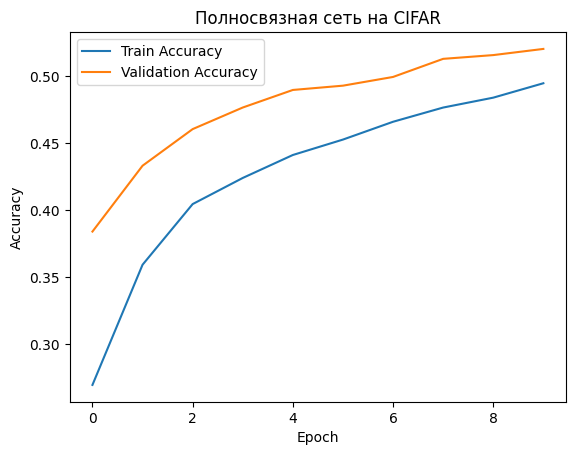

In [12]:
model = utils.FullyConnectedModel(
    input_dim=3072,
    output_dim=10,
    layers=[
        utils.LinearLayer(256),
        utils.BatchNorm(),
        utils.ReLULayer(),
        utils.Dropout(0.3),
        utils.LinearLayer(128),
        utils.BatchNorm(),
        utils.ReLULayer(),
        utils.Dropout(0.3),
        utils.LinearLayer(128),
        utils.BatchNorm(),
        utils.ReLULayer(),
        utils.Dropout(0.3),
        utils.LinearLayer(128),
        utils.BatchNorm(),
        utils.ReLULayer(),
        utils.Dropout(0.3),
        utils.LinearLayer(128),
        utils.BatchNorm(),
        utils.ReLULayer(),
        utils.Dropout(0.3),
        utils.LinearLayer(128),
        utils.BatchNorm(),
        utils.ReLULayer(),
        utils.Dropout(0.3),
        utils.LinearLayer(128),
        utils.BatchNorm(),
        utils.ReLULayer(),
    ],
).to("cuda")
trainer = utils.Trainer(
    model=model, dataset=cifar_dataset, device="cuda", batch_size=128
)
time_start = time.time()
result = trainer()
print(f"Время обучения: {time.time() - time_start:.2f} секунд")
print(f"Точность на тренировочной выборке: {result[-1].train_accuracy:.2f}")
print(f"Точность на валидационной выборке: {result[-1].val_accuracy:.2f}")
model.eval()
print(f"Время инференса: {get_inference_time(model, torch.randn(1, 3072).to('cuda')):.6f} секунд")

plt.plot([r.train_accuracy for r in result], label="Train Accuracy")
plt.plot([r.val_accuracy for r in result], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Полносвязная сеть на CIFAR")
plt.show()

#### Confusion Matrix

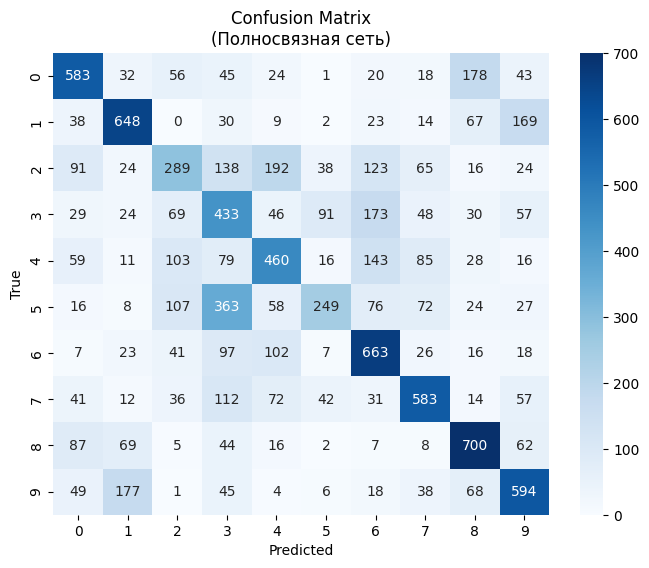

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(result[-1].val_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix\n(Полносвязная сеть)")
plt.show()

### CNN с Residual блоками

Время обучения: 257.20 секунд
Точность на тренировочной выборке: 0.89
Точность на валидационной выборке: 0.80
Время инференса: 0.006189 секунд


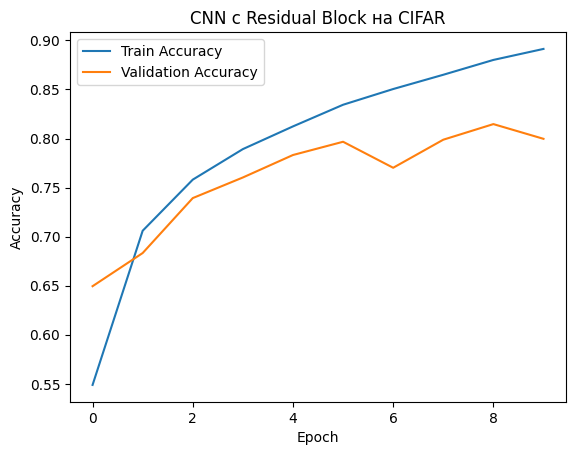

In [14]:
model = utils.CNNWithResidual(
    input_channels=3,
    num_classes=10,
)
trainer = utils.Trainer(
    model=model, dataset=cifar_dataset, device="cuda", batch_size=128
)
time_start = time.time()
result = trainer()
print(f"Время обучения: {time.time() - time_start:.2f} секунд")
print(f"Точность на тренировочной выборке: {result[-1].train_accuracy:.2f}")
print(f"Точность на валидационной выборке: {result[-1].val_accuracy:.2f}")
print(f"Время инференса: {get_inference_time(model, torch.randn(1, 3, 32, 32).to('cuda')):.6f} секунд")

plt.plot([r.train_accuracy for r in result], label="Train Accuracy")
plt.plot([r.val_accuracy for r in result], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN с Residual Block на CIFAR")
plt.show()

#### Confusion Matrix

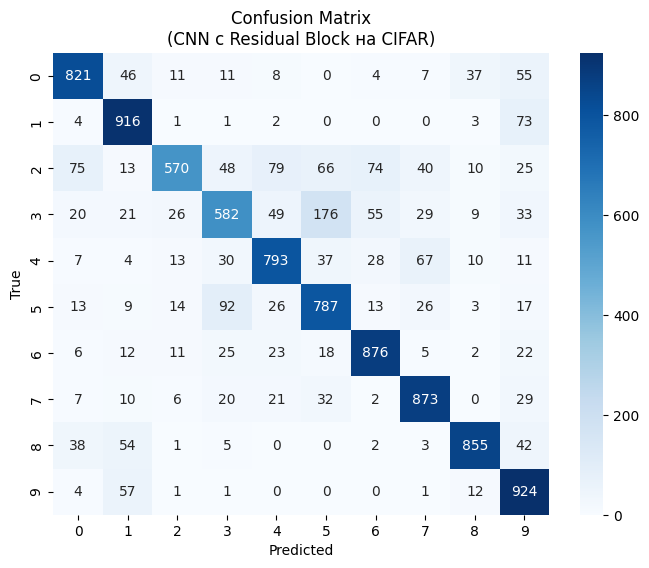

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(result[-1].val_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix\n(CNN с Residual Block на CIFAR)")
plt.show()

### CNN с регуляризацией и Residual блоками

Время обучения: 272.47 секунд
Точность на тренировочной выборке: 0.87
Точность на валидационной выборке: 0.80
Время инференса: 0.005464 секунд


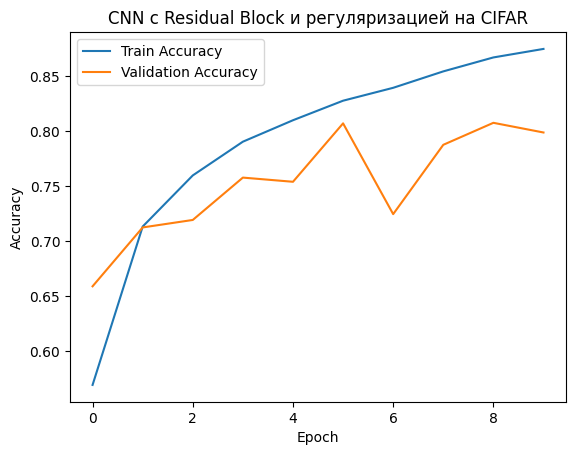

In [5]:
model = utils.CNNWithResidual(
    input_channels=3,
    num_classes=10,
)
trainer = utils.Trainer(
    model=model, dataset=cifar_dataset, device="cuda", batch_size=128, weight_decay=0.001,
)
time_start = time.time()
result = trainer()
print(f"Время обучения: {time.time() - time_start:.2f} секунд")
print(f"Точность на тренировочной выборке: {result[-1].train_accuracy:.2f}")
print(f"Точность на валидационной выборке: {result[-1].val_accuracy:.2f}")
print(f"Время инференса: {get_inference_time(model, torch.randn(1, 3, 32, 32).to('cuda')):.6f} секунд")

plt.plot([r.train_accuracy for r in result], label="Train Accuracy")
plt.plot([r.val_accuracy for r in result], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN с Residual Block и регуляризацией на CIFAR")
plt.show()

#### Confusion Matrix

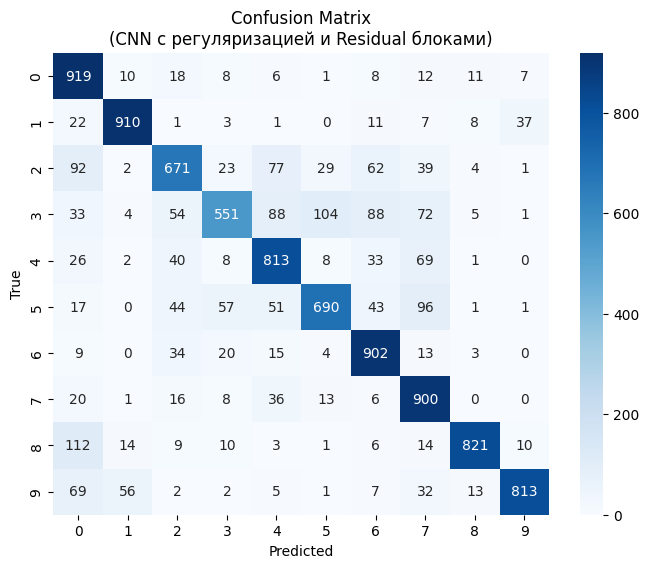

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(result[-1].val_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix\n(CNN с регуляризацией и Residual блоками)")
plt.show()

### Результат

| |Время обучения|Точность (train)|Точность (validate)|Время инференса|
|-|--------------|----------------|-------------------|---------------|
|Полносвязная сеть|199.41|0.49|0.52|0.006294|
|CNN с Residual Block|257.20|0.89|0.80|0.006189|
|CNN с регуляризацией и Residual блоками|272.47|0.87|0.80|0.005464|